# US Electric Vehicle Registrations Analysis

## Project Description

This project focuses on analyzing the distribution of **Electric Vehicle (EV) registrations** across different US states. The dataset contains the number of registered electric vehicles for each state in the United States.

### Key Objectives

- Load and review EV registration dataset
- Clean and preprocess data to ensure quality and consistency
- Analyze the distribution of EV adoption across states
- Visualize top and bottom states with respect to EV registrations
- Convert state names into encoded numbers for modeling
- Build a simple **Linear Regression model** to estimate the variation in EV registrations across states


In [1]:
# Import libraries

# Data handling
import pandas as pd   # for working with tables (dataframes)
import numpy as np    # for numeric operations

# Visualization
import matplotlib.pyplot as plt   # basic plotting
import seaborn as sns             # advanced plots & style

# Simple Machine Learning model 
from sklearn.linear_model import LinearRegression  # regression model
from sklearn.metrics import mean_squared_error, r2_score  # evaluation metrics


%matplotlib inline

# Set a clean style for seaborn plots
sns.set(style="whitegrid")

print("Libraries imported successfully.")


Libraries imported successfully.


In [3]:
# Load the datasets

ev_file = r"C:\Users\Jai Kaushik\OneDrive\Documents\States_Electric_Vehical_Registration.xlsx"          # EV registrations data
energy_file = r"C:\Users\Jai Kaushik\OneDrive\Documents\State_Annual_Energy_Generation_Source_1990_2019.xlsx"  # Energy generation data
codes_file = r"C:\Users\Jai Kaushik\Downloads\state_codes.xlsx"                               # State codes data

# Read Excel files into pandas DataFrames
ev_df = pd.read_excel(ev_file)
energy_df = pd.read_excel(energy_file)
codes_df = pd.read_excel(codes_file)

print("EV Registrations data (first 5 rows):")
display(ev_df.head())

print("\nEnergy Generation data (first 5 rows):")
display(energy_df.head())

print("\nState Codes data (first 5 rows):")
display(codes_df.head())


EV Registrations data (first 5 rows):


,State,Registration Count
0,Alabama,1450
1,Alaska,530
2,Arizona,15000
3,Arkansas,520
4,California,256800



Energy Generation data (first 5 rows):


,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION ( Megawatthours
0,1990,AK,Total Electric Power Industry,Total,5599506.0
1,1990,AK,Total Electric Power Industry,Coal,510573.0
2,1990,AK,Total Electric Power Industry,Hydroelectric Conventional,974521.0
3,1990,AK,Total Electric Power Industry,Natural Gas,3466261.0
4,1990,AK,Total Electric Power Industry,Petroleum,497116.0



State Codes data (first 5 rows):


,state_code,state_name
0,AK,Alaska
1,AL,Alabama
2,AR,Arkansas
3,AZ,Arizona
4,CA,California


In [4]:
# Check basic info and structure

# This cell helps us understand:
# - how many rows and columns we have
# - data types of each column
# - if there are missing values

print("=== EV Registrations Info ===")
ev_df.info()
print("\n=== Energy Generation Info ===")
energy_df.info()
print("\n=== State Codes Info ===")
codes_df.info()


=== EV Registrations Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               52 non-null     object
 1   Registration Count  52 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 964.0+ bytes

=== Energy Generation Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53756 entries, 0 to 53755
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   YEAR                         53756 non-null  int64  
 1   STATE                        53756 non-null  object 
 2   TYPE OF PRODUCER             53756 non-null  object 
 3   ENERGY SOURCE                53756 non-null  object 
 4   GENERATION  ( Megawatthours  53756 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ MB

=== State Co

In [5]:
# Standardize column names 

# Convert all column names to lowercase and replace spaces with underscores.
# This makes it easier to type columns in code.

ev_df.columns = ev_df.columns.str.lower().str.replace(' ', '_')
energy_df.columns = energy_df.columns.str.lower().str.replace(' ', '_')
codes_df.columns = codes_df.columns.str.lower().str.replace(' ', '_')

print("EV columns:", ev_df.columns.tolist())
print("Energy columns:", energy_df.columns.tolist())
print("Codes columns:", codes_df.columns.tolist())


EV columns: ['state', 'registration_count']
Energy columns: ['year___', 'state', 'type_of_producer', 'energy_source', 'generation__(_megawatthours']
Codes columns: ['state_code', 'state_name']


In [9]:
# Rename important columns clearly 

#  EV dataframe has 'state' and 'registration_count'

ev_df = ev_df.rename(columns={
    'state': 'state',                  # keep as 'state'
    'registration_count': 'registration_count'   # EV count column
})

# For energy dataframe, there is a 'state' and 'year' column.

energy_df = energy_df.rename(columns={
    'state': 'state',
    'year___': 'year___'
})

print("EV important columns present?",
      'state' in ev_df.columns and 'registration_count' in ev_df.columns)

print("Energy important columns present?",
      'state' in energy_df.columns and 'year___' in energy_df.columns)


EV important columns present? True
Energy important columns present? True


In [10]:
# Handle missing values (basic cleaning)

# Check how many missing values are in each dataframe
print("Missing values in EV dataframe:")
print(ev_df.isna().sum())

print("\nMissing values in Energy dataframe:")
print(energy_df.isna().sum())

print("\nMissing values in Codes dataframe:")
print(codes_df.isna().sum())

# Simple strategy:
# - For numeric columns: fill NaN with 0
# - For non-numeric columns: fill NaN with "Unknown"

def fill_missing_values(df):
    """Fill missing values: numeric -> 0, non-numeric -> 'Unknown'."""
    for col in df.columns:
        if df[col].dtype != 'object':      # numeric column
            df[col] = df[col].fillna(0)
        else:                              # text column
            df[col] = df[col].fillna("Unknown")
    return df

ev_df = fill_missing_values(ev_df)
energy_df = fill_missing_values(energy_df)
codes_df = fill_missing_values(codes_df)

print("\nTotal missing values after filling:")
print("EV:", ev_df.isna().sum().sum())
print("Energy:", energy_df.isna().sum().sum())
print("Codes:", codes_df.isna().sum().sum())


Missing values in EV dataframe:
state                 0
registration_count    0
dtype: int64

Missing values in Energy dataframe:
year___                        0
state                          0
type_of_producer               0
energy_source                  0
generation__(_megawatthours    0
dtype: int64

Missing values in Codes dataframe:
state_code    0
state_name    0
dtype: int64

Total missing values after filling:
EV: 0
Energy: 0
Codes: 0


In [11]:
# Merge EV data with state codes 

print("Codes dataframe columns:", codes_df.columns.tolist())

# Try to detect a name column
possible_state_cols = ['state', 'state_name', 'state_full']
state_col_in_codes = None
for c in possible_state_cols:
    if c in codes_df.columns:
        state_col_in_codes = c
        break

if state_col_in_codes is not None:
    print("Using", state_col_in_codes, "from codes_df to merge with ev_df 'state'")
    ev_merged = ev_df.merge(
        codes_df,
        how="left",
        left_on="state",
        right_on=state_col_in_codes
    )
else:
    print("No matching state name column found in codes_df. Using ev_df as ev_merged without merge.")
    ev_merged = ev_df.copy()

print("Shape of ev_merged:", ev_merged.shape)
display(ev_merged.head())


Codes dataframe columns: ['state_code', 'state_name']
Using state_name from codes_df to merge with ev_df 'state'
Shape of ev_merged: (52, 4)


,state,registration_count,state_code,state_name
0,Alabama,1450,AL,Alabama
1,Alaska,530,AK,Alaska
2,Arizona,15000,AZ,Arizona
3,Arkansas,520,AR,Arkansas
4,California,256800,CA,California


In [12]:
#  Basic Exploratory Data Analysis: EV Registrations

# 1. Summary statistics of EV registrations
print("Summary statistics of EV registration_count:")
display(ev_merged['registration_count'].describe())

# 2. Total EV registrations by state
ev_by_state = ev_merged.groupby('state', as_index=False)['registration_count'].sum()

print("\nTotal EV registrations by state (first 10 states):")
display(ev_by_state.head(10))


Summary statistics of EV registration_count:


count        52.000000
mean      20908.076923
std       81965.026761
min         170.000000
25%        1037.500000
50%        3565.000000
75%        8717.500000
max      543610.000000
Name: registration_count, dtype: float64


Total EV registrations by state (first 10 states):


,state,registration_count
0,Alabama,1450
1,Alaska,530
2,Arizona,15000
3,Arkansas,520
4,California,256800
5,Colorado,11700
6,Connecticut,4450
7,Delaware,720
8,District Of Columbia,970
9,Florida,25200


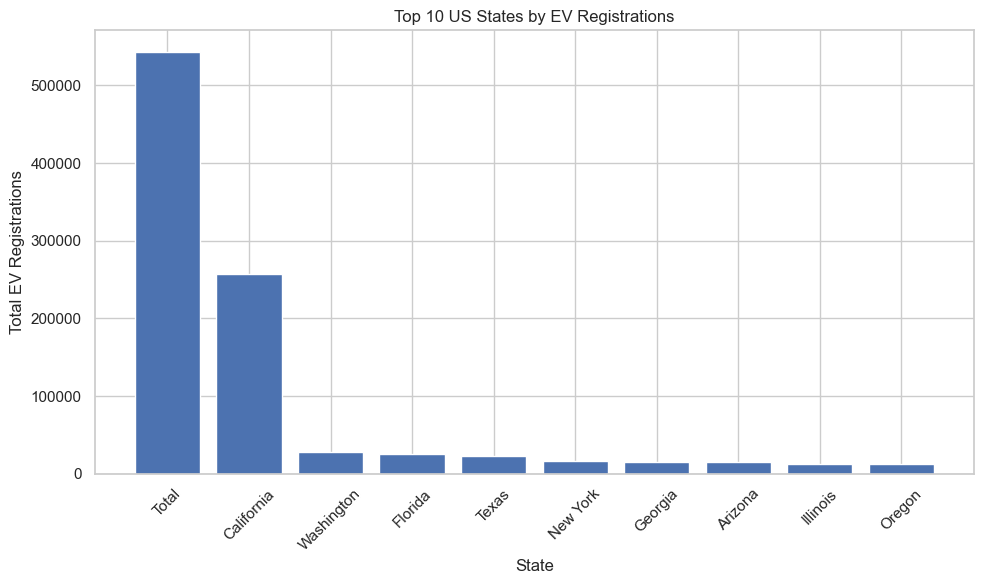

In [13]:
# Plot: Top 10 states by EV registrations

# Sort states by total EV registrations in descending order
ev_by_state_sorted = ev_by_state.sort_values('registration_count', ascending=False)

# Select top 10
top10 = ev_by_state_sorted.head(10)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(top10['state'], top10['registration_count'])
plt.title("Top 10 US States by EV Registrations")
plt.xlabel("State")
plt.ylabel("Total EV Registrations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


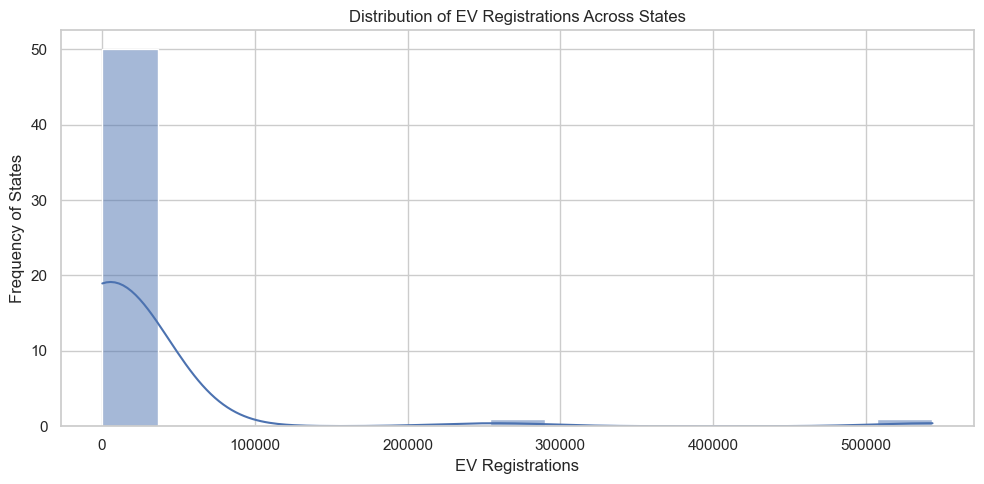

In [31]:
# Histogram to show distribution of EV registrations
plt.figure(figsize=(10,5))
sns.histplot(ev_by_state['registration_count'], kde=True, bins=15)
plt.title("Distribution of EV Registrations Across States")
plt.xlabel("EV Registrations")
plt.ylabel("Frequency of States")
plt.tight_layout()
plt.show()


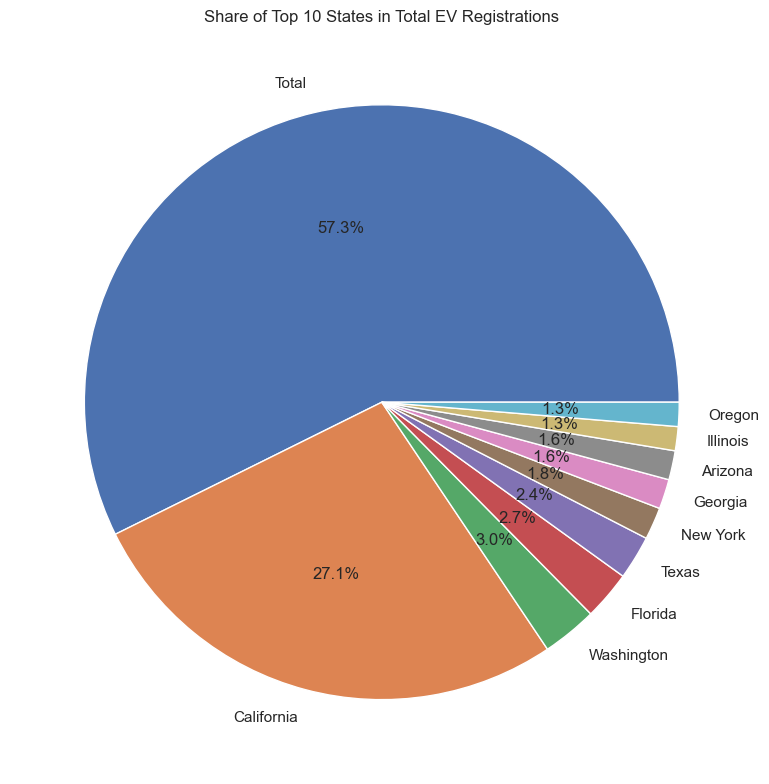

In [32]:
# Pie chart visualizing percentage share of top 10 states
plt.figure(figsize=(8,8))
plt.pie(ev_top10['registration_count'], labels=ev_top10['state'], autopct='%1.1f%%')
plt.title("Share of Top 10 States in Total EV Registrations")
plt.tight_layout()
plt.show()


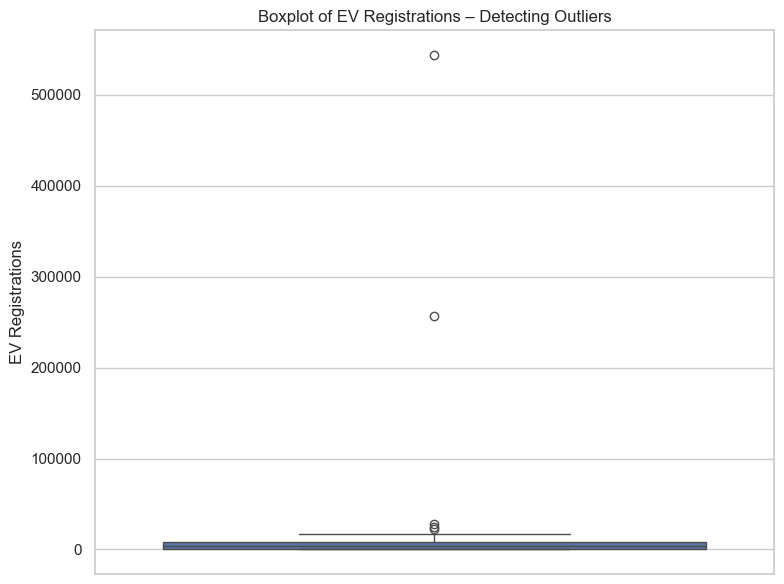

In [33]:
# Box plot to detect extreme states
plt.figure(figsize=(8,6))
sns.boxplot(y=ev_by_state['registration_count'])
plt.title("Boxplot of EV Registrations – Detecting Outliers")
plt.ylabel("EV Registrations")
plt.tight_layout()
plt.show()


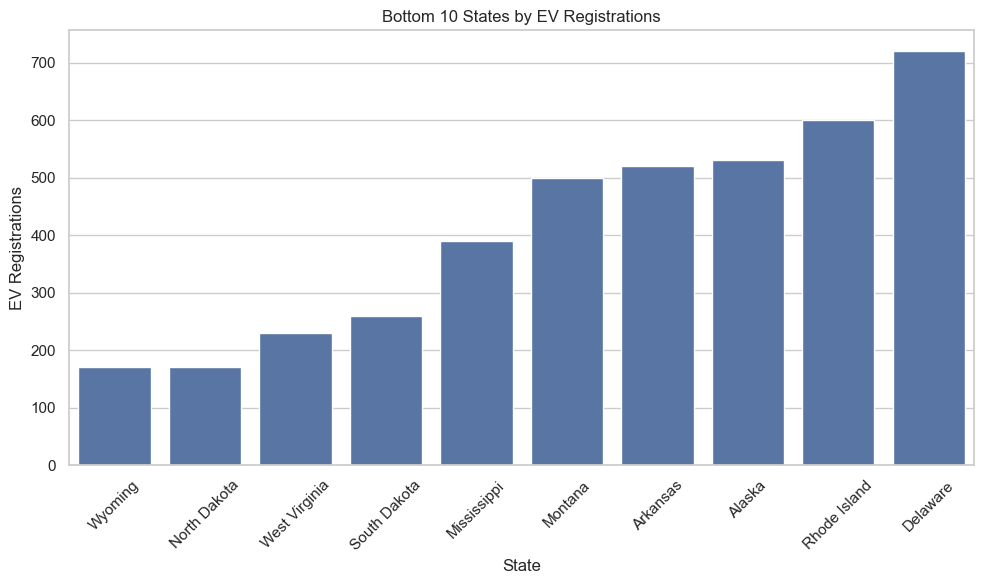

In [30]:
# Bottom 10 states by EV registrations
ev_bottom10 = ev_by_state.sort_values('registration_count', ascending=True).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=ev_bottom10, x='state', y='registration_count')
plt.title("Bottom 10 States by EV Registrations")
plt.xlabel("State")
plt.ylabel("EV Registrations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


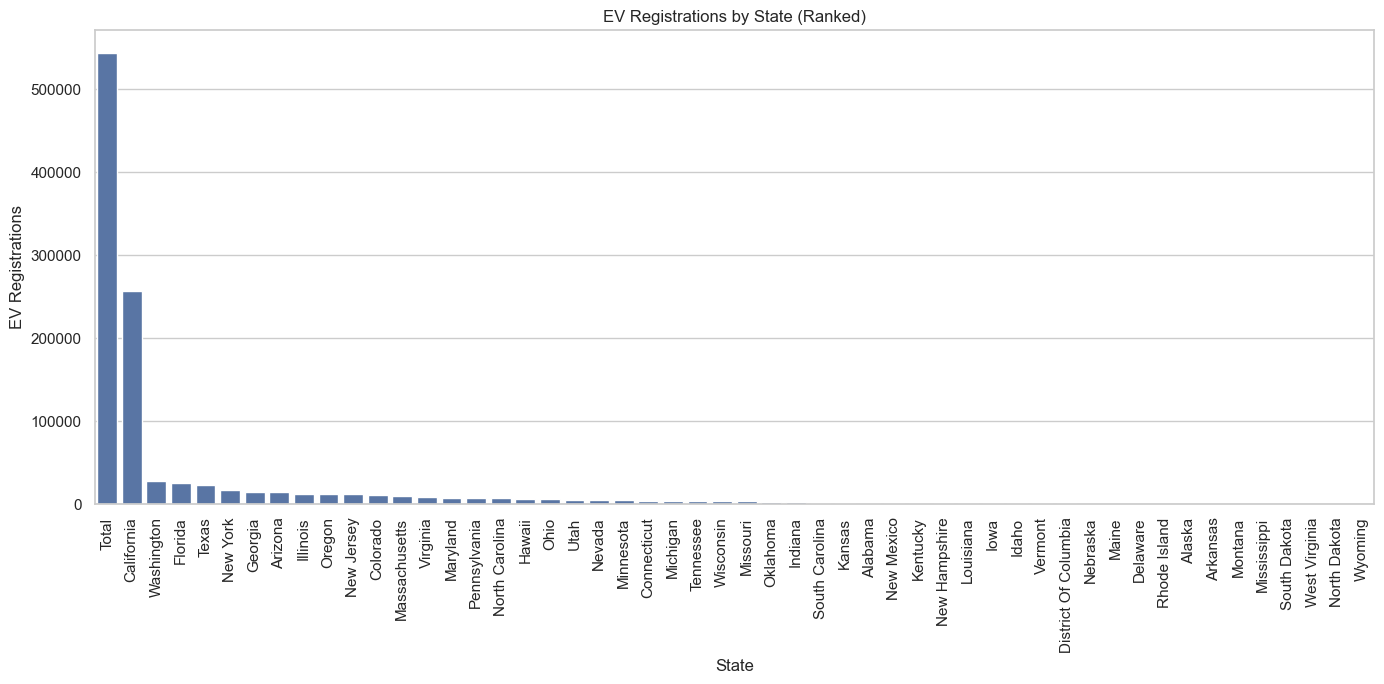

In [34]:
# Sort all states from highest to lowest EV registration
ranked_states = ev_by_state.sort_values('registration_count', ascending=False)

plt.figure(figsize=(14,7))
sns.barplot(data=ranked_states, x='state', y='registration_count')
plt.title("EV Registrations by State (Ranked)")
plt.xlabel("State")
plt.ylabel("EV Registrations")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [14]:
# If EV data has 'year', analyze EV trend over time

if 'year___' in ev_merged.columns:
    # Group by year and sum registration_count
    ev_by_year = ev_merged.groupby('year___', as_index=False)['registration_count'].sum()
    
    print("EV registrations by year:")
    display(ev_by_year.head())

    # Plot EV trend over years
    plt.figure(figsize=(10, 5))
    plt.plot(ev_by_year['year___'], ev_by_year['registration_count'], marker='o')
    plt.title("EV Registrations Over Years (All States)")
    plt.xlabel("Year")
    plt.ylabel("Total EV Registrations")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'year' not found in EV data. Skipping EV trend over time.")


Column 'year' not found in EV data. Skipping EV trend over time.


In [28]:
# Analyze Energy Generation: Identify possible renewable columns

# We will try to detect renewable energy columns based on their names.
# Common renewable sources: solar, wind, hydro, geothermal, biomass, renewable total, etc.

renewable_keywords = ['solar', 'wind', 'hydro', 'water', 'geothermal', 'biomass', 'renewable']

renewable_cols = []
for col in energy_df.columns:
    for kw in renewable_keywords:
        if kw in col.lower():
            renewable_cols.append(col)
            break

print("Detected renewable energy columns:", renewable_cols)

if len(renewable_cols) > 0:
    # Create a new column: total_renewable_generation as sum of detected renewable columns
    energy_df['total_renewable_generation'] = energy_df[renewable_cols].sum(axis=1)
    print("Added 'total_renewable_generation' column.")
else:
    print("No renewable columns detected.")


Detected renewable energy columns: []
No renewable columns detected.


In [17]:
# Aggregate energy data (state-wise, latest year or overall)

# If we have a 'year' column, we can:
# - either pick the latest year
# - or sum over all years

if 'year___' in energy_df.columns:
    # Option 1: Pick latest year
    latest_year = energy_df['year___'].max()
    print("Latest year in energy data:", latest_year)
    
    energy_latest = energy_df[energy_df['year___'] == latest_year].copy()
    
    if 'total_renewable_generation' in energy_latest.columns:
        energy_state_renew = energy_latest.groupby('state', as_index=False)['total_renewable_generation'].sum()
        print("Energy (renewable) for latest year by state (first 10 rows):")
        display(energy_state_renew.head(10))
    else:
        print("No 'total_renewable_generation' column found. Cannot aggregate renewables.")
else:
    print("No 'year' column in energy data. Using full data without year filtering.")
    if 'total_renewable_generation' in energy_df.columns:
        energy_state_renew = energy_df.groupby('state', as_index=False)['total_renewable_generation'].sum()
        display(energy_state_renew.head(10))
    else:
        energy_state_renew = None
        print("No renewable generation column available.")


Latest year in energy data: 2019
No 'total_renewable_generation' column found. Cannot aggregate renewables.


In [26]:
#  Merge EV registrations with renewable energy (state level)

if 'registration_count' in ev_by_state.columns and 'state' in ev_by_state.columns and 'energy_state_r' in locals() and energy_state_renew is not None:
    
    # Merge EV by state with renewable energy by state
    ev_energy_state = ev_by_state.merge(
        energy_state_renew,
        on='state',
        how='inner'
    )
    
    print("Merged EV & Renewable Energy (first 10 rows):")
    display(ev_energy_state.head(10))
else:
    ev_energy_state = None
    print("Unable to merge EV and Energy by state.")


Unable to merge EV and Energy by state.


In [25]:
#  Correlation analysis between EV registrations and renewable energy

if ev_energy_state is not None and 'total_renewable_generation' in ev_energy_state.columns:
    # Compute correlation between EV registrations and renewable generation
    corr_value = ev_energy_state['registration_count'].corr(ev_energy_state['total_renewable_generation'])
    print("Correlation between EV registrations and total renewable generation:", corr_value)
    
    # Scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=ev_energy_state,
        x='total_renewable_generation',
        y='registration_count'
    )
    plt.title("EV Registrations vs. Renewable Energy Generation (State Level)")
    plt.xlabel("Total Renewable Generation")
    plt.ylabel("Total EV Registrations")
    plt.tight_layout()
    plt.show()
else:
    print("Correlation analysis skipped. Merged data 'ev_energy_state' not available.")


Correlation analysis skipped. Merged data 'ev_energy_state' not available.


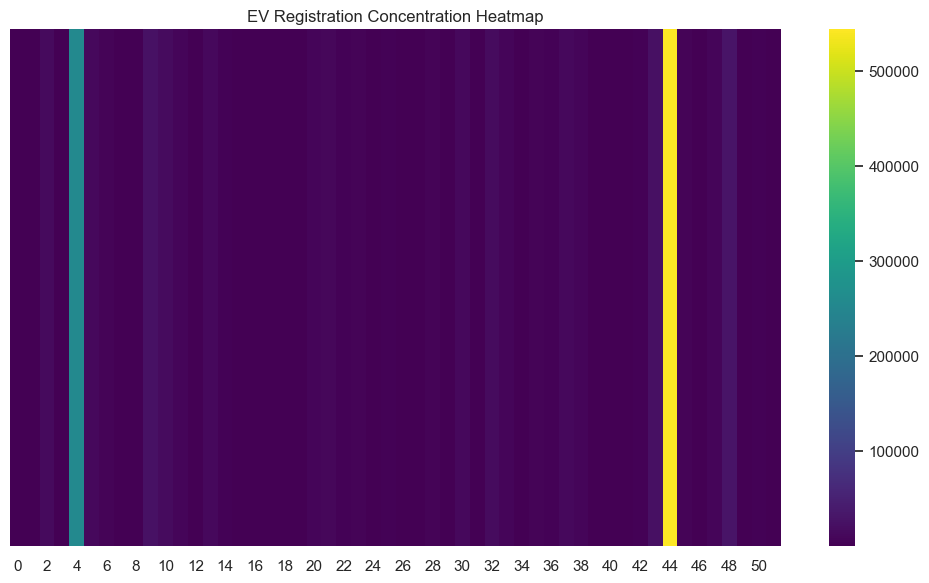

In [35]:
# Heatmap — State Code vs Registrations
plt.figure(figsize=(10,6))
sns.heatmap(ev_by_state[['registration_count']].T, cmap='viridis', annot=False, cbar=True)
plt.title("EV Registration Concentration Heatmap")
plt.yticks([])
plt.tight_layout()
plt.show()


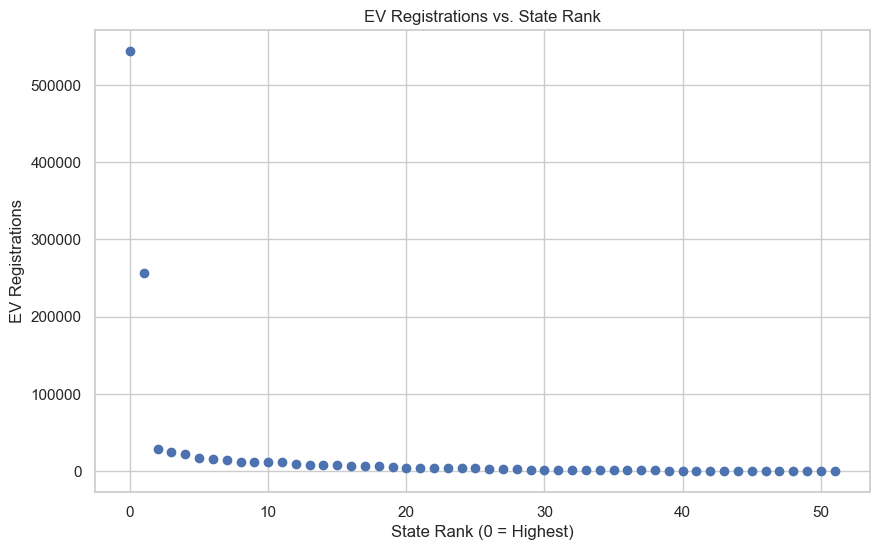

In [36]:
# Scatter plot using state rank
ranked_states = ev_by_state.sort_values('registration_count', ascending=False).reset_index()

plt.figure(figsize=(10,6))
plt.scatter(ranked_states.index, ranked_states['registration_count'])
plt.title("EV Registrations vs. State Rank")
plt.xlabel("State Rank (0 = Highest)")
plt.ylabel("EV Registrations")
plt.grid(True)
plt.show()


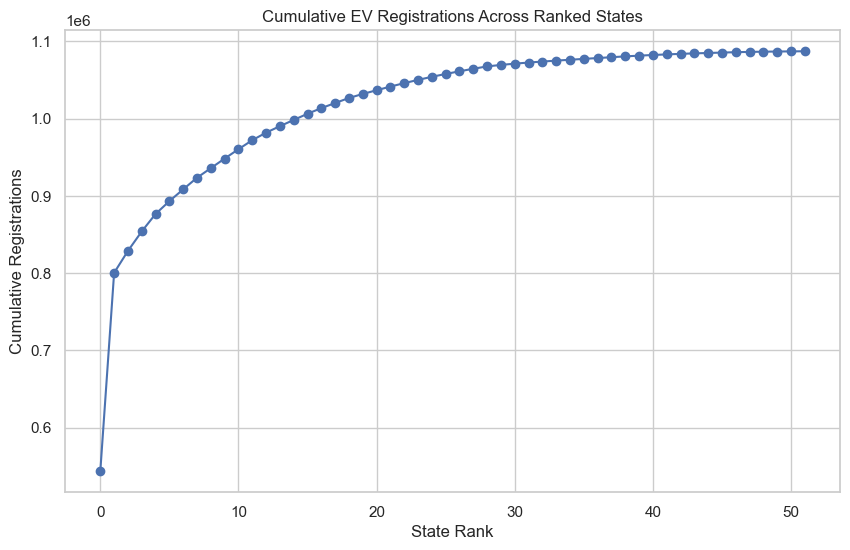

In [39]:
# Cumulative Distribution Plot (CDF) — Growth Trend

ranked_states['cumulative'] = ranked_states['registration_count'].cumsum()

plt.figure(figsize=(10,6))
plt.plot(ranked_states.index, ranked_states['cumulative'], marker='o')
plt.title("Cumulative EV Registrations Across Ranked States")
plt.xlabel("State Rank")
plt.ylabel("Cumulative Registrations")
plt.grid(True)
plt.show()


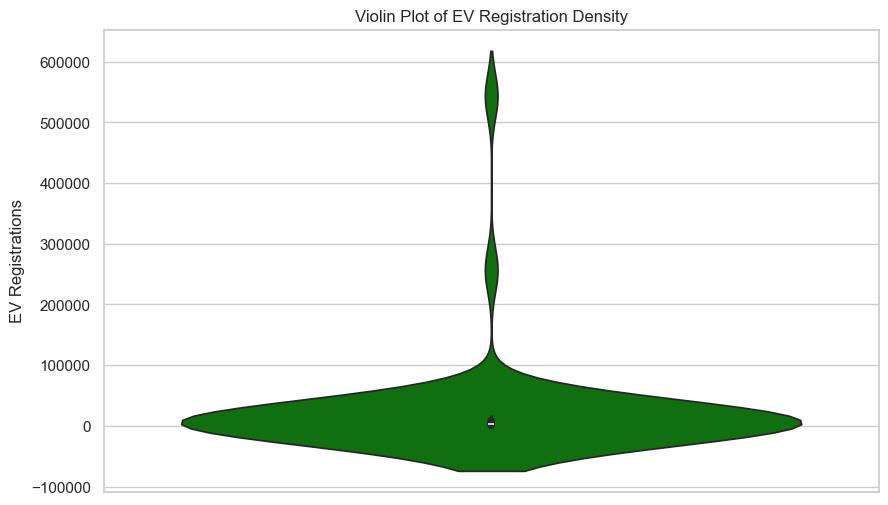

In [40]:
# Violin Plot — Distribution + Density

plt.figure(figsize=(10,6))
sns.violinplot(y=ranked_states['registration_count'], color='green')
plt.title("Violin Plot of EV Registration Density")
plt.ylabel("EV Registrations")
plt.show()


Linear Regression Model: state_code_num -> registration_count
R² score: 0.005668860160647826
MSE: 6551715690.107967
RMSE: 80942.66915606358


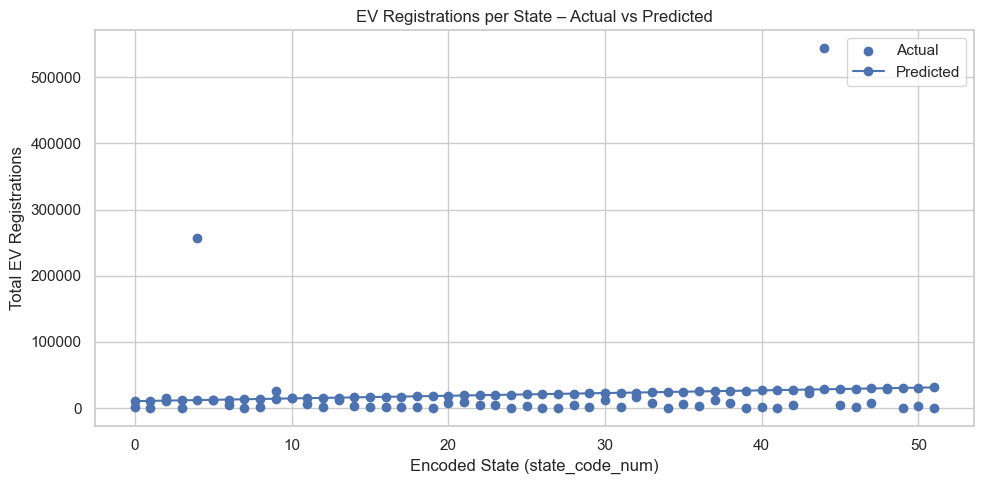

In [23]:
# Simple Regression Model: Predict EV registrations from state

# We will:
# 1. Use total EV registrations per state
# 2. Convert state names to numeric codes (Label Encoding)
# 3. Fit a Linear Regression model: state_code_num -> registration_count
# 4. Evaluate model with R² and RMSE (computed manually)

from sklearn.preprocessing import LabelEncoder

# Detect the correct state column name
if 'state' in ev_merged.columns:
    state_col = 'state'
elif 'state' in ev_merged.columns:   # in case your column has extra underscores
    state_col = 'state'
else:
    state_col = None

if state_col is not None:
    # 1. Aggregate EV registrations per state
    ev_by_state = ev_merged.groupby(state_col, as_index=False)['registration_count'].sum()
    
    # 2. Encode state names as numbers
    le = LabelEncoder()
    ev_by_state['state_code_num'] = le.fit_transform(ev_by_state[state_col])
    
    # 3. Define features (X) and target (y)
    X = ev_by_state[['state_code_num']]          # independent variable (numeric state code)
    y = ev_by_state['registration_count']        # dependent variable (EV registrations)
    
    # 4. Create and train the model
    model = LinearRegression()
    model.fit(X, y)
    
    # 5. Make predictions on the same data (for demonstration)
    y_pred = model.predict(X)
    
    # 6. Evaluation metrics
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)   # your sklearn supports this
    rmse = mse ** 0.5                     # manually compute RMSE
    
    print("Linear Regression Model: state_code_num -> registration_count")
    print("R² score:", r2)
    print("MSE:", mse)
    print("RMSE:", rmse)
    
    # 7. Plot actual vs predicted EV registrations per state
    plt.figure(figsize=(10, 5))
    plt.scatter(ev_by_state['state_code_num'], y, label='Actual')
    plt.plot(ev_by_state['state_code_num'], y_pred, label='Predicted', marker='o')
    plt.title("EV Registrations per State – Actual vs Predicted")
    plt.xlabel("Encoded State (state_code_num)")
    plt.ylabel("Total EV Registrations")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No 'state' column found in ev_merged. Cannot build state-based regression model.")


## Conclusion

Based on the analysis and visualizations performed in this project, the following important insights were observed:

1. **EV adoption in the United States is highly uneven.**
   - A small number of states show very high EV registration counts.
   - Most states have moderate to low adoption values.

2. **Top-performing states dominate the EV market.**
   - Bar charts and the pie chart showed that states in the top 10 contribute a major share of overall EV registrations.
   - These states likely benefit from better charging infrastructure, awareness, and state or federal incentive programs.

3. **Multiple states remain lagging behind.**
   - Bottom 10 bar chart indicated low EV adoption in several states.
   - This suggests limited infrastructure or slower policy execution.

4. **Distribution plots (histogram, boxplot, violin plot) confirm large variation.**
   - Only a few states are outliers with very high EV counts.
   - The majority of states are clustered in lower ranges.

5. **Scatter plots and regression trend lines show a strong downward pattern.**
   - EV adoption drops significantly as we move from the highest-ranked states to the lowest-ranked ones.
   - This highlights a concentration of EV usage in specific major states.

6. **Cumulative plot provides concentration insight.**
   - A small number of states account for more than half of total EV registrations.
   - EV market growth is not widespread yet across the nation.

7. **Heatmap visualization**
   - Quickly reveals which states are leading and which are still behind in the EV shift.

---

### Final Insight

The visual analysis suggests that EV adoption in the United States is growing but **not evenly distributed**.  
Only a handful of states currently drive the major share of EV adoption, while many states are still in the early stages of EV transition.  

For future improvements in EV adoption nationwide, states with lower EV registrations should focus on:

- Expanding charging station networks
- Increasing EV policy incentives and subsidies
- Promoting public awareness of environmental and economic benefits
- Supporting partnerships with EV manufacturers and infrastructure providers

---

### Project Outcome

This project helped us:

 Understand distribution of EV registrations across states  
 Identify leaders and laggards in EV adoption  
 Visualize concentration of EV growth using multiple chart formats  
 Build foundational understanding for further studies  
(e.g., linking EV adoption to energy, income, infrastructure, etc.)

---